<a href="https://colab.research.google.com/github/imams12/COVID-Data-Analytics/blob/main/COVID_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Library

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Import Data


In [15]:
path = "gdrive/MyDrive/DATA/COVID/"

In [16]:
os.listdir(path)

['COVID-19 Indonesia.xlsx']

# Load Data, Eksplorasi Data Sederhana, dan Data Cleaning

Load data ke jupyter notebook ataupun membaca data ke Python, kita dapat dibantu oleh library Pandas. Pandas dapat dianalogikan sebagai Microsoft Excel di Python. Library ini sangat populer di bidang pengolahan data.

## Statistik Harian Nasional

In [17]:
data=path + 'COVID-19 Indonesia.xlsx'
daily_stats=pd.read_excel(data,sheet_name='Statistik Harian')

daily_stats.head()

,Date,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites,Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Vaksinasi (ineligible),Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),...,Dosis pertama (%),Dosis kedua (%),Dosis pertama (harian),Dosis kedua (harian),Dosis harian,Dosis pertama (mingguan),Dosis kedua (mingguan),Rata2 dosis harian (mingguan),Dosis pertama (SDM kesehatan),Dosis kedua (SDM kesehatan),Dosis ketiga (SDM kesehatan),Dosis pertama (SDM kesehatan) %,Dosis kedua (SDM kesehatan) %,Dosis pertama (petugas publik),Dosis kedua (petugas publik),Dosis pertama (petugas publik) %,Dosis kedua (petugas publik) %,Dosis pertama (lansia),Dosis kedua (lansia),Dosis pertama (lansia) %,Dosis kedua (lansia) %,Dosis pertama (warga umum),Dosis kedua (warga umum),Dosis pertama (remaja),Dosis kedua (remaja),Dosis pertama (Vakgor),Dosis kedua (Vakgor),Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,2020-03-02,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,339.0,339.0,335.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.5,169.5,0.0,0.005900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,341.0,341.0,337.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,170.5,170.5,NaN,0.005865,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,372.0,372.0,356.0,2.0,14.0,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,186.0,186.0,NaN,0.005376,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,388.0,388.0,371.0,2.0,15.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,194.0,194.0,NaN,0.005155,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,2.0,0.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,450.0,450.0,422.0,4.0,24.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,112.5,112.5,31.0,0.008889,0.037736,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
daily_stats.describe()

,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites,Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Vaksinasi (ineligible),Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),...,Dosis pertama (%),Dosis kedua (%),Dosis pertama (harian),Dosis kedua (harian),Dosis harian,Dosis pertama (mingguan),Dosis kedua (mingguan),Rata2 dosis harian (mingguan),Dosis pertama (SDM kesehatan),Dosis kedua (SDM kesehatan),Dosis ketiga (SDM kesehatan),Dosis pertama (SDM kesehatan) %,Dosis kedua (SDM kesehatan) %,Dosis pertama (petugas publik),Dosis kedua (petugas publik),Dosis pertama (petugas publik) %,Dosis kedua (petugas publik) %,Dosis pertama (lansia),Dosis kedua (lansia),Dosis pertama (lansia) %,Dosis kedua (lansia) %,Dosis pertama (warga umum),Dosis kedua (warga umum),Dosis pertama (remaja),Dosis kedua (remaja),Dosis pertama (Vakgor),Dosis kedua (Vakgor),Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
count,539.000000,10.000000,10.00000,5.390000e+02,539.000000,539.000000,539.000000,5.390000e+02,539.000000,531.000000,539.000000,539.000000,539.000000,530.000000,91.000000,91.000000,463.000000,5.390000e+02,5.390000e+02,5.390000e+02,186.000000,171.000000,495.000000,167.000000,167.000000,537.000000,169.000000,169.000000,3.000000,529.000000,539.000000,539.000000,534.000000,539.000000,536.000000,537.000000,529.000000,489.000000,489.000000,489.000000,...,2.230000e+02,2.090000e+02,2.230000e+02,209.000000,2.230000e+02,217.000000,203.000000,2.170000e+02,1.750000e+02,1.750000e+02,6.000000,168.000000,168.000000,1.750000e+02,1.750000e+02,168.000000,168.000000,1.750000e+02,1.750000e+02,168.000000,168.000000,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,3.000000,3.000000,1.490000e+02,149.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,361.000000
mean,7400.840445,1.300000,1.40000,9.276235e+05,109572.936920,0.294425,6625.380334,7.914317e+05,0.665770,0.895877,236.014842,26618.840445,0.039805,0.102433,16932.021978,108970.252747,95470.591553,8.150476e+06,5.427808e+06,4.500183e+06,51318.349462,3.859649,61886.272727,68584.604790,47711.299401,38305.797020,38866.769231,38839.745562,18758.750000,20482.977372,11.879303,8.560072,6.755861,0.152508,0.177477,0.030814,0.168049,61650.023371,41406.481157,1.538501,...,6.677130e-02,3.550294e-02,2.570621e+05,152527.004785,4.007041e+05,257749.153390,150192.360310,3.985857e+05,1.530667e+06,1.363690e+06,381992.500000,1.035462,0.935752,1.356019e+07,6.845941e+06,0.813949,0.411553,3.233114e+06,1.890666e+06,0.155900,0.091376,1.449698e+07,4.435335e+06,1.443198e+06,3.218980e+05,706705.000000,378840.333333,2.925861e+04,3342.322846,4256.517730,503.148936,4138.556434,0.106777,0.100899,9381.836879,1479.070922,8983.047991,0.171111,0.157901,0.165045
std,10117.432399,2.540779,1.95505,1.008178e+06,125138.294325,0.267925,9332.940881,8.722187e+05,0.282478,0.152400,377.757829,28050.040788,0.018786,0.147478,6656.426909,88732.567124,58548.880470,8.066876e+06,5.467668e+06,4.465493e+06,54010.121237,22.635557,57461.217349,37780.718894,32090.874861,38930.491376,23651.875700,24944.579591,9020.173401,20249.869828,16.358019,16.621589

In [19]:
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date                                               539 non-null    datetime64[ns]
 1   Kasus harian                                       539 non-null    float64       
 2   Kasus Impor                                        10 non-null     float64       
 3   Kasus Lokal                                        10 non-null     float64       
 4   Total kasus                                        539 non-null    float64       
 5   Kasus aktif                                        539 non-null    float64       
 6   % kasus aktif                                      539 non-null    float64       
 7   Sembuh
(baru)                                      539 non-null    float64       
 8   Sembuh              

In [20]:
daily_stats=daily_stats[['Date','Dosis pertama (harian)','Dosis kedua (harian)']]
daily_stats

,Date,Dosis pertama (harian),Dosis kedua (harian)
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


### Data Cleaning

Meliputi missing value handling dan mengganti nama kolom

In [21]:
# Ganti Nama Kolom

daily_stats.rename({'Dosis pertama (harian)':'Dosis1','Dosis kedua (harian)':'Dosis2'},axis=1,inplace=True)
daily_stats

,Date,Dosis1,Dosis2
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


In [22]:
#Missing Value Handling
#Kolom Selain Date terlebih dahulu

daily_stats['Dosis1'].fillna(0,inplace=True)
daily_stats.Dosis2.fillna(0,inplace=True)
daily_stats

,Date,Dosis1,Dosis2
0,2020-03-02,0.0,0.0
1,2020-03-03,0.0,0.0
2,2020-03-04,0.0,0.0
3,2020-03-05,0.0,0.0
4,2020-03-06,0.0,0.0
...,...,...,...
563,NaT,0.0,0.0
564,NaT,0.0,0.0
565,NaT,0.0,0.0
566,NaT,0.0,0.0


In [23]:
#Handling missing value kolom Date dan Mengganti Index menjadi Date

daily_stats.dropna(inplace=True)
daily_stats.set_index('Date',inplace=True)
daily_stats

,Dosis1,Dosis2
Date,,
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
2020-03-04,0.0,0.0
2020-03-05,0.0,0.0
2020-03-06,0.0,0.0
...,...,...
2021-08-19,644813.0,702847.0
2021-08-20,357948.0,355245.0
2021-08-21,598148.0,619482.0


## Kasus Harian Per Provinsi

In [24]:
daily_cases=pd.read_excel(data,sheet_name='Kasus Aktif')

daily_cases

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-16,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-18,NaN,NaN,4.0,NaN,NaN,1.0,30.0,NaN,12.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-19,NaN,NaN,10.0,NaN,NaN,2.0,52.0,NaN,2.0,4.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2021-08-19,355.0,1032.0,395.0,452.0,129.0,1175.0,731.0,357.0,3266.0,1428.0,3019.0,468.0,1100.0,302.0,791.0,416.0,183.0,219.0,305.0,291.0,168.0,1129.0,156.0,892.0,833.0,375.0,835.0,42.0,13.0,84.0,200.0,99.0,714.0,99.0
523,2021-08-20,459.0,1039.0,449.0,440.0,98.0,820.0,968.0,325.0,2742.0,3432.0,2508.0,391.0,921.0,244.0,644.0,358.0,203.0,199.0,263.0,390.0,231.0,1481.0,62.0,685.0,595.0,371.0,764.0,18.0,17.0,53.0,136.0,89.0,491.0,118.0
524,2021-08-21,382.0,849.0,374.0,393.0,71.0,930.0,891.0,321.0,1747.0,1236.0,2122.0,265.0,657.0,179.0,705.0,241.0,203.0,134.0,236.0,532.0,215.0,1189.0,58.0,551.0,546.0,319.0,610.0,35.0,11.0,22.0,187.0,109.0,377.0,47.0
525,2021-08-22,334.0,583.0,214.0,301.0,113.0,783.0,702.0,198.0,1192.0,822.0,1301.0,245.0,599.0,290.0,410.0,183.0,19.0,195.0,175.0,330.0,253.0,1002.0,53.0,411.0,318.0,243.0,568.0,16.0,7.0,9.0,74.0,83.0,295.0,87.0


In [25]:
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       527 non-null    datetime64[ns]
 1   Aceh       424 non-null    float64       
 2   Bali       510 non-null    float64       
 3   Banten     513 non-null    float64       
 4   Babel      419 non-null    float64       
 5   Bengkulu   434 non-null    float64       
 6   DIY        500 non-null    float64       
 7   Jakarta    526 non-null    float64       
 8   Jambi      406 non-null    float64       
 9   Jabar      521 non-null    float64       
 10  Jateng     520 non-null    float64       
 11  Jatim      518 non-null    float64       
 12  Kalbar     400 non-null    float64       
 13  Kaltim     505 non-null    float64       
 14  Kalteng    474 non-null    float64       
 15  Kalsel     500 non-null    float64       
 16  Kaltara    423 non-null    float64       
 1

In [26]:
#Handling Missing Value
daily_cases.fillna(0,inplace=True)
daily_cases.set_index('Date',inplace=True)
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sembuh Harian per Provinsi

In [27]:
daily_recovered=pd.read_excel(data,sheet_name='Sembuh Harian')

daily_recovered

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2021-08-19,238.0,1025.0,408.0,587.0,100.0,2121.0,934.0,362.0,6680.0,1804.0,3715.0,529.0,1293.0,202.0,762.0,241.0,260.0,158.0,793.0,678.0,245.0,1786.0,218.0,241.0,803.0,266.0,702.0,165.0,96.0,213.0,73.0,209.0,940.0,165.0
517,2021-08-20,244.0,1244.0,470.0,581.0,100.0,2347.0,948.0,340.0,3071.0,1160.0,3347.0,728.0,1434.0,279.0,624.0,417.0,208.0,148.0,469.0,682.0,449.0,1311.0,116.0,1054.0,842.0,430.0,1187.0,64.0,133.0,117.0,61.0,108.0,1210.0,199.0
518,2021-08-21,255.0,1197.0,152.0,483.0,103.0,2547.0,915.0,194.0,1654.0,1514.0,3359.0,528.0,1222.0,354.0,631.0,383.0,240.0,171.0,466.0,735.0,375.0,832.0,160.0,975.0,577.0,441.0,1119.0,66.0,98.0,379.0,50.0,121.0,595.0,120.0
519,2021-08-22,178.0,1055.0,862.0,443.0,189.0,1123.0,1102.0,480.0,1830.0,1385.0,2682.0,532.0,1732.0,239.0,682.0,458.0,247.0,249.0,878.0,1610.0,514.0,1031.0,125.0,1224.0,755.0,419.0,669.0,136.0,150.0,336.0,59.0,104.0,621.0,177.0


In [28]:
#Handling Missing Value & Mengganti Index
daily_recovered.fillna(0,inplace=True)
daily_recovered.set_index('Date',inplace=True)
daily_recovered.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Meninggal Harian per Provinsi

In [29]:
daily_death=pd.read_excel(data,sheet_name='Meninggal Harian')

daily_death

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,1.0,1.0,NaN,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2021-08-19,12.0,62.0,17.0,12.0,2.0,57.0,34.0,10.0,239.0,388.0,223.0,16.0,71.0,5.0,29.0,6.0,22.0,6.0,17.0,15.0,11.0,34.0,8.0,26.0,23.0,90.0,28.0,7.0,2.0,2.0,1.0,3.0,10.0,4.0
517,2021-08-20,18.0,73.0,4.0,16.0,22.0,47.0,11.0,4.0,268.0,363.0,203.0,16.0,45.0,6.0,19.0,9.0,16.0,8.0,24.0,17.0,2.0,21.0,5.0,21.0,17.0,35.0,30.0,0.0,0.0,0.0,0.0,4.0,10.0,14.0
518,2021-08-21,29.0,57.0,6.0,13.0,17.0,29.0,13.0,9.0,343.0,311.0,213.0,12.0,37.0,5.0,27.0,5.0,14.0,4.0,16.0,11.0,5.0,39.0,1.0,21.0,29.0,15.0,43.0,4.0,3.0,4.0,0.0,9.0,8.0,9.0
519,2021-08-22,24.0,52.0,2.0,14.0,0.0,39.0,28.0,8.0,59.0,317.0,203.0,12.0,26.0,5.0,28.0,9.0,7.0,4.0,21.0,4.0,4.0,19.0,2.0,19.0,21.0,51.0,29.0,3.0,0.0,2.0,0.0,3.0,9.0,6.0


In [30]:
#Handling Missing Value dan Mengubah Index
daily_death.fillna(0,inplace=True)
daily_death.set_index('Date',inplace=True)
daily_death.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

Menjawab pertanyaan berikut:
- Bagaimana perkembangan covid-19 di Indonesia?

- Apakah kita sudah mengalami puncak kedua?

- Provinsi mana yang paling banyak total kasusnya?

- Apakah PPKM sudah cukup efektif mengurangi kasus Covid-19?

- Bagaimana perkembangan vaksinasi di Indonesia baik dosis pertama atau kedua?


In [31]:
daily_cases['Nasional']=daily_cases.sum(axis=1)
daily_recovered['Nasional']=daily_recovered.sum(axis=1)
daily_death['Nasional']=daily_death.sum(axis=1)

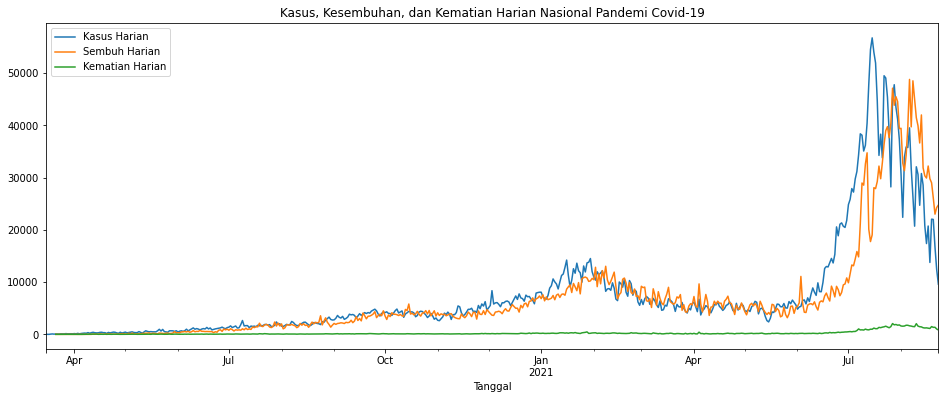

In [32]:
fig,ax=plt.subplots(figsize=(16,6))

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
daily_recovered['Nasional'].plot(kind='line',ax=ax,label='Sembuh Harian')
daily_death['Nasional'].plot(kind='line',ax=ax,label='Kematian Harian')
ax.set_xlabel('Tanggal')
ax.set_title('Kasus, Kesembuhan, dan Kematian Harian Nasional Pandemi Covid-19')
ax.legend()

**Insight dari grafik:**
- Tren kasus dan kesembuhan harian memiliki trend yang serupa.
- Jumlah orang yang meninggal karena covid-19 jauh lebih sedikit dibandingkan yang sembuh
- Berdasarkan trend kasus positif harian, Indonesia sudah mengalami dua kali puncak, dimana puncak pertama di sekitar Januari-Februari 2021 dan puncak kedua sekitar Juli 2021. *Apakah seluruh daerah mengalami dua kali puncak atau hanya daerah tertentu saja dengan jumlah kasus yang paling banyak di antara yang lain?*

In [33]:
island_prov={
    'Aceh':'Sumatera','Bali':'Bali-Nusa Tenggara','Banten':'Jawa','Babel':'Sumatera', 'Bengkulu':'Sumatera', 'DIY':'Jawa',
    'Jakarta':'Jawa', 'Jambi':'Sumatera', 'Jabar':'Jawa', 'Jateng':'Jawa', 'Jatim':'Jawa', 'Kalbar':'Kalimantan',
    'Kaltim':'Kalimantan', 'Kalteng':'Kalimantan', 'Kalsel':'Kalimantan', 'Kaltara':'Kalimantan', 'Kep Riau':'Sumatera',
    'NTB':'Bali-Nusa Tenggara', 'Sumsel':'Sumatera', 'Sumbar':'Sumatera', 'Sulut':'Sulawesi', 'Sumut':'Sumatera',
    'Sultra':'Sulawesi', 'Sulsel':'Sulawesi', 'Sulteng':'Sulawesi', 'Lampung':'Sumatera', 'Riau':'Sumatera',
    'Malut':'Maluku - Papua', 'Maluku':'Maluku - Papua', 'Papbar':'Maluku - Papua', 'Papua':'Maluku - Papua',
    'Sulbar':'Sulawesi', 'NTT':'Bali-Nusa Tenggara', 'Gorontalo':'Sulawesi'
}

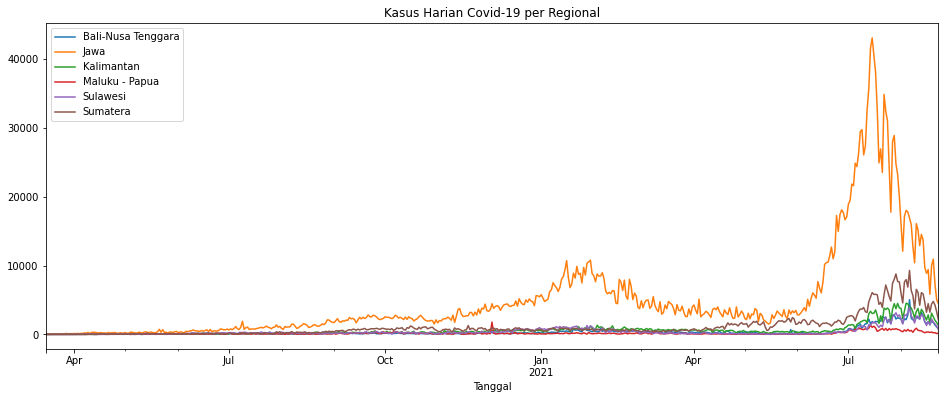

In [34]:
fig,ax=plt.subplots(figsize=(16,6))

daily_cases_region=daily_cases.rename(island_prov,axis=1).drop(columns='Nasional')
daily_cases_region=daily_cases_region.transpose().groupby(daily_cases_region.columns).sum().transpose()

daily_cases_region.plot(kind='line',ax=ax)
ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Covid-19 per Regional')
ax.legend()

**Insight dari grafik:**
- Kasus tertinggi terjadi di Pulau Jawa. Regional yang paling sedikit kasusnya adalah Maluku-Papua
- Puncak di bulan Januari - Februari 2021 hanya terjadi di pulau Jawa
- Semua regional mengalami puncak di sekitar bulan Juli 2021
- Selama Pulau Jawa mengalami penurunan jumlah kasus harian setelah mengalami puncak kedua, daerah lain seperti Sumatera, Kalimantan, Sulawesi, dan Bali-Nusa Tenggara mengalami kenaikan jumlah kasus

Puncak kasus Covid di tanggal 2021-07-15 00:00:00


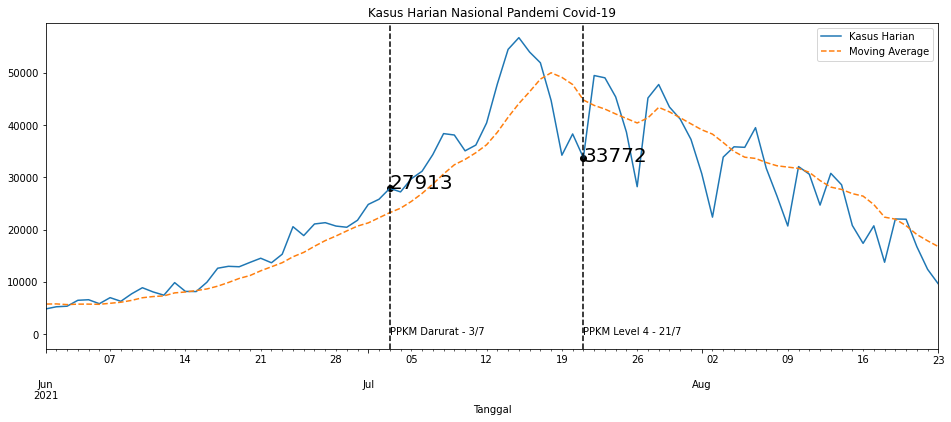

In [35]:
fig,ax=plt.subplots(figsize=(16,6))

MA_cases=daily_cases['Nasional'].rolling(window=7).mean()

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
MA_cases.plot(kind='line',ax=ax,label='Moving Average', ls='--')

ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Nasional Pandemi Covid-19')

ax.axvline(x='2021-07-03',color='black',ls='--')
ax.annotate('PPKM Darurat - 3/7', ('2021-07-03',1))
ax.axvline(x='2021-07-21',color='black',ls='--')
ax.annotate('PPKM Level 4 - 21/7', ('2021-07-21',1))

ax.scatter('2021-07-03',daily_cases['Nasional'].loc['2021-07-03'],color='black')
ax.scatter('2021-07-21',daily_cases['Nasional'].loc['2021-07-21'],color='black')
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-03']), ('2021-07-03',27900), fontsize=20)
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-21']), ('2021-07-21',33000), fontsize=20)

ax.legend()
ax.set_xlim('2021-06-01','2021-08-23')

print('Puncak kasus Covid di tanggal',daily_cases[daily_cases['Nasional']==daily_cases['Nasional'].max()].index[0])

**Insight:**
- Dilansir https://megapolitan.kompas.com/read/2021/07/15/13220151/awal-mula-varian-delta-masuk-ke-jakarta-hingga-mendominasi-90-persen, varian Delta masuk ke Indonesia sejak tanggal 3 Mei 2021 dan diperparah dengan libur lebaran 21 Mei - 10 Juni 2021, kasus harian Indonesia terus melonjak hingga tanggal 3 Juli 2021 diberlakukan PPKM Darurat Jawa-Bali ketika kasus harian nasional mencapai 27.913 kasus.
- Pemberlakuan PPKM darurat belum cukup efektif menekan jumlah kasus harian sampai mengalami puncak di tanggal 15 Juli 2021 akibat varian Delta, namun mulai terjadi penurunan meskipun kasus melonjak lagi sejak diberlakukannya PPKM Level 4 di tanggal 21 Juli 2021.
- Sejak diberlakukan PPKM Level 4, tren kasus Covid kian menurun hingga tanggal 23 Agustus 2021 di bawah 10.000 kasus.

Text(0.5, 1.0, 'Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

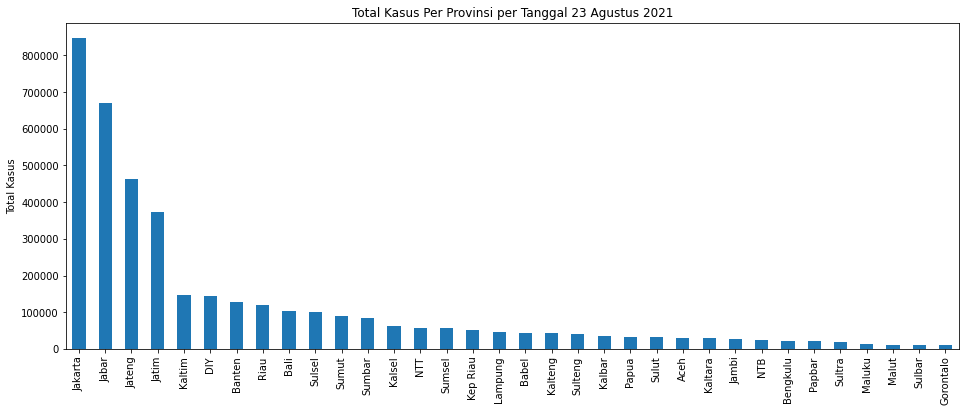

In [36]:
fig,ax=plt.subplots(figsize=(16,6))
daily_cases.drop(columns='Nasional').sum().sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Total Kasus')
ax.set_title('Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

**Insight:**

5 provinsi paling banyak kasusnya adalah Jakarta, Jabar, Jateng, Jatim, dan Kaltim (Di dominasi oleh pulau Jawa)

(737791.0, 738025.0)

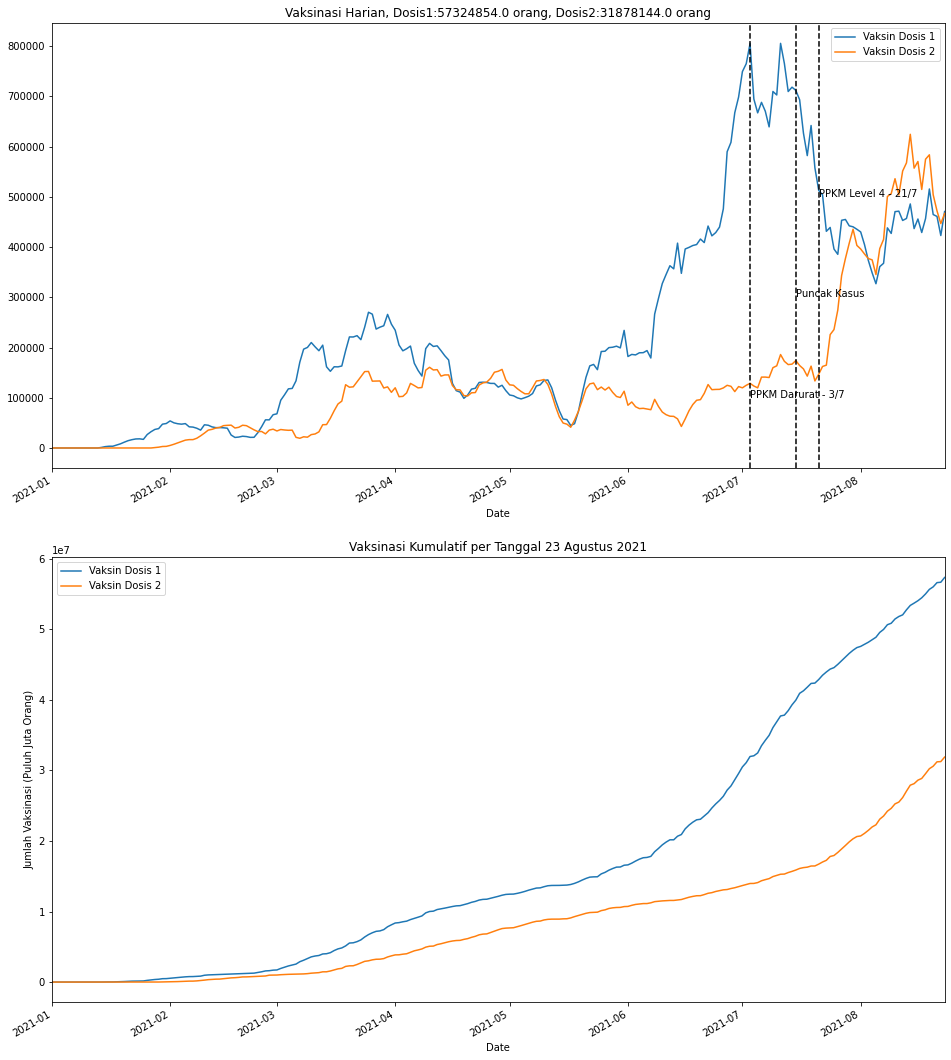

In [37]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(16,20))

daily_stats['Dosis1'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 1')
daily_stats['Dosis2'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 2')

ax[0].axvline(x='2021-07-15', color='black',ls='--')
ax[0].annotate('Puncak Kasus', ('2021-07-15',300000))
ax[0].axvline(x='2021-07-03',color='black',ls='--')
ax[0].annotate('PPKM Darurat - 3/7', ('2021-07-03',100000))
ax[0].axvline(x='2021-07-21',color='black',ls='--')
ax[0].annotate('PPKM Level 4 - 21/7', ('2021-07-21',500000))

ax[0].set_title('Vaksinasi Harian, Dosis1:{} orang, Dosis2:{} orang'.format(daily_stats['Dosis1'].sum(),daily_stats['Dosis2'].sum()))
ax[0].legend()
ax[0].set_xlim('2021-01-01','2021-08-23')

daily_stats['Dosis1'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 1')
daily_stats['Dosis2'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 2')
ax[1].set_xlim('2021-01-01','2021-08-23')
ax[1].set_ylabel('Jumlah Vaksinasi (Puluh Juta Orang)')
ax[1].set_title('Vaksinasi Kumulatif per Tanggal 23 Agustus 2021')
ax[1].legend()
ax[1].set_xlim('2021-01-01','2021-08-23')

**Insight:**
- Per tanggal 23 Agustus 2021, jumlah orang yang sudah divaksin dosis pertama sebanyak hampir 60 Juta orang sedangkan dosis 2 mencapai sekitar 30 Juta orang, perbedaannya hampir 50%.
- Jumlah orang yang telah mendapatkan vaksin dosis pertama mengalami lonjakan sejak bulan Juni 2021 namun cenderung menurun sejak diberlakukannya PPKM Darurat hingga awal agustus mengalami peningkatan kembali.
- Jumlah orang yang telah mendapatkan vaksin dosis kedua terus meningkat.

# Import Library

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data, Eksplorasi Data Sederhana, dan Data Cleaning

Load data ke jupyter notebook ataupun membaca data ke Python, kita dapat dibantu oleh library Pandas. Pandas dapat dianalogikan sebagai Microsoft Excel di Python. Library ini sangat populer di bidang pengolahan data.

## Statistik Harian Nasional

In [40]:
data= path + 'COVID-19 Indonesia.xlsx'
daily_stats=pd.read_excel(data,sheet_name='Statistik Harian')

daily_stats.head()

,Date,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites,Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Vaksinasi (ineligible),Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),...,Dosis pertama (%),Dosis kedua (%),Dosis pertama (harian),Dosis kedua (harian),Dosis harian,Dosis pertama (mingguan),Dosis kedua (mingguan),Rata2 dosis harian (mingguan),Dosis pertama (SDM kesehatan),Dosis kedua (SDM kesehatan),Dosis ketiga (SDM kesehatan),Dosis pertama (SDM kesehatan) %,Dosis kedua (SDM kesehatan) %,Dosis pertama (petugas publik),Dosis kedua (petugas publik),Dosis pertama (petugas publik) %,Dosis kedua (petugas publik) %,Dosis pertama (lansia),Dosis kedua (lansia),Dosis pertama (lansia) %,Dosis kedua (lansia) %,Dosis pertama (warga umum),Dosis kedua (warga umum),Dosis pertama (remaja),Dosis kedua (remaja),Dosis pertama (Vakgor),Dosis kedua (Vakgor),Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,2020-03-02,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,339.0,339.0,335.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.5,169.5,0.0,0.005900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,341.0,341.0,337.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,170.5,170.5,NaN,0.005865,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,372.0,372.0,356.0,2.0,14.0,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,186.0,186.0,NaN,0.005376,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,388.0,388.0,371.0,2.0,15.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,194.0,194.0,NaN,0.005155,0.000000,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,2.0,0.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,450.0,450.0,422.0,4.0,24.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,112.5,112.5,31.0,0.008889,0.037736,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
daily_stats.describe()

,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus),Tingkat kematian (closed cases),PDP,ODP,Suspek aktif,Jumlah spesimen diperiksa (dari 1 April),Jumlah orang diperiksa,Negatif,Positif \n(=C),Dalam Proses,Spesimen,Spesimen (PCR-TCM),Spesimen (Antigen),Orang yang dites,Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Vaksinasi (ineligible),Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),...,Dosis pertama (%),Dosis kedua (%),Dosis pertama (harian),Dosis kedua (harian),Dosis harian,Dosis pertama (mingguan),Dosis kedua (mingguan),Rata2 dosis harian (mingguan),Dosis pertama (SDM kesehatan),Dosis kedua (SDM kesehatan),Dosis ketiga (SDM kesehatan),Dosis pertama (SDM kesehatan) %,Dosis kedua (SDM kesehatan) %,Dosis pertama (petugas publik),Dosis kedua (petugas publik),Dosis pertama (petugas publik) %,Dosis kedua (petugas publik) %,Dosis pertama (lansia),Dosis kedua (lansia),Dosis pertama (lansia) %,Dosis kedua (lansia) %,Dosis pertama (warga umum),Dosis kedua (warga umum),Dosis pertama (remaja),Dosis kedua (remaja),Dosis pertama (Vakgor),Dosis kedua (Vakgor),Test PCR Orang Nasional Rata-rata 7 hari,Pos Rate Nasional - rata-rata 7 hari,Test Orang DKI,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
count,539.000000,10.000000,10.00000,5.390000e+02,539.000000,539.000000,539.000000,5.390000e+02,539.000000,531.000000,539.000000,539.000000,539.000000,530.000000,91.000000,91.000000,463.000000,5.390000e+02,5.390000e+02,5.390000e+02,186.000000,171.000000,495.000000,167.000000,167.000000,537.000000,169.000000,169.000000,3.000000,529.000000,539.000000,539.000000,534.000000,539.000000,536.000000,537.000000,529.000000,489.000000,489.000000,489.000000,...,2.230000e+02,2.090000e+02,2.230000e+02,209.000000,2.230000e+02,217.000000,203.000000,2.170000e+02,1.750000e+02,1.750000e+02,6.000000,168.000000,168.000000,1.750000e+02,1.750000e+02,168.000000,168.000000,1.750000e+02,1.750000e+02,168.000000,168.000000,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,3.000000,3.000000,1.490000e+02,149.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,361.000000
mean,7400.840445,1.300000,1.40000,9.276235e+05,109572.936920,0.294425,6625.380334,7.914317e+05,0.665770,0.895877,236.014842,26618.840445,0.039805,0.102433,16932.021978,108970.252747,95470.591553,8.150476e+06,5.427808e+06,4.500183e+06,51318.349462,3.859649,61886.272727,68584.604790,47711.299401,38305.797020,38866.769231,38839.745562,18758.750000,20482.977372,11.879303,8.560072,6.755861,0.152508,0.177477,0.030814,0.168049,61650.023371,41406.481157,1.538501,...,6.677130e-02,3.550294e-02,2.570621e+05,152527.004785,4.007041e+05,257749.153390,150192.360310,3.985857e+05,1.530667e+06,1.363690e+06,381992.500000,1.035462,0.935752,1.356019e+07,6.845941e+06,0.813949,0.411553,3.233114e+06,1.890666e+06,0.155900,0.091376,1.449698e+07,4.435335e+06,1.443198e+06,3.218980e+05,706705.000000,378840.333333,2.925861e+04,3342.322846,4256.517730,503.148936,4138.556434,0.106777,0.100899,9381.836879,1479.070922,8983.047991,0.171111,0.157901,0.165045
std,10117.432399,2.540779,1.95505,1.008178e+06,125138.294325,0.267925,9332.940881,8.722187e+05,0.282478,0.152400,377.757829,28050.040788,0.018786,0.147478,6656.426909,88732.567124,58548.880470,8.066876e+06,5.467668e+06,4.465493e+06,54010.121237,22.635557,57461.217349,37780.718894,32090.874861,38930.491376,23651.875700,24944.579591,9020.173401,20249.869828,16.358019,16.621589

In [42]:
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date                                               539 non-null    datetime64[ns]
 1   Kasus harian                                       539 non-null    float64       
 2   Kasus Impor                                        10 non-null     float64       
 3   Kasus Lokal                                        10 non-null     float64       
 4   Total kasus                                        539 non-null    float64       
 5   Kasus aktif                                        539 non-null    float64       
 6   % kasus aktif                                      539 non-null    float64       
 7   Sembuh
(baru)                                      539 non-null    float64       
 8   Sembuh              

In [43]:
daily_stats=daily_stats[['Date','Dosis pertama (harian)','Dosis kedua (harian)']]
daily_stats

,Date,Dosis pertama (harian),Dosis kedua (harian)
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


### Data Cleaning

Meliputi missing value handling dan mengganti nama kolom

In [44]:
# Ganti Nama Kolom

daily_stats.rename({'Dosis pertama (harian)':'Dosis1','Dosis kedua (harian)':'Dosis2'},axis=1,inplace=True)
daily_stats

,Date,Dosis1,Dosis2
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN
...,...,...,...
563,NaT,NaN,NaN
564,NaT,NaN,NaN
565,NaT,NaN,NaN
566,NaT,NaN,NaN


In [45]:
#Missing Value Handling
#Kolom Selain Date terlebih dahulu

daily_stats['Dosis1'].fillna(0,inplace=True)
daily_stats.Dosis2.fillna(0,inplace=True)
daily_stats

,Date,Dosis1,Dosis2
0,2020-03-02,0.0,0.0
1,2020-03-03,0.0,0.0
2,2020-03-04,0.0,0.0
3,2020-03-05,0.0,0.0
4,2020-03-06,0.0,0.0
...,...,...,...
563,NaT,0.0,0.0
564,NaT,0.0,0.0
565,NaT,0.0,0.0
566,NaT,0.0,0.0


In [46]:
#Handling missing value kolom Date dan Mengganti Index menjadi Date

daily_stats.dropna(inplace=True)
daily_stats.set_index('Date',inplace=True)
daily_stats

,Dosis1,Dosis2
Date,,
2020-03-02,0.0,0.0
2020-03-03,0.0,0.0
2020-03-04,0.0,0.0
2020-03-05,0.0,0.0
2020-03-06,0.0,0.0
...,...,...
2021-08-19,644813.0,702847.0
2021-08-20,357948.0,355245.0
2021-08-21,598148.0,619482.0


## Kasus Harian Per Provinsi

In [47]:
daily_cases=pd.read_excel(data,sheet_name='Kasus Aktif')

daily_cases

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-16,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-18,NaN,NaN,4.0,NaN,NaN,1.0,30.0,NaN,12.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-19,NaN,NaN,10.0,NaN,NaN,2.0,52.0,NaN,2.0,4.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2021-08-19,355.0,1032.0,395.0,452.0,129.0,1175.0,731.0,357.0,3266.0,1428.0,3019.0,468.0,1100.0,302.0,791.0,416.0,183.0,219.0,305.0,291.0,168.0,1129.0,156.0,892.0,833.0,375.0,835.0,42.0,13.0,84.0,200.0,99.0,714.0,99.0
523,2021-08-20,459.0,1039.0,449.0,440.0,98.0,820.0,968.0,325.0,2742.0,3432.0,2508.0,391.0,921.0,244.0,644.0,358.0,203.0,199.0,263.0,390.0,231.0,1481.0,62.0,685.0,595.0,371.0,764.0,18.0,17.0,53.0,136.0,89.0,491.0,118.0
524,2021-08-21,382.0,849.0,374.0,393.0,71.0,930.0,891.0,321.0,1747.0,1236.0,2122.0,265.0,657.0,179.0,705.0,241.0,203.0,134.0,236.0,532.0,215.0,1189.0,58.0,551.0,546.0,319.0,610.0,35.0,11.0,22.0,187.0,109.0,377.0,47.0
525,2021-08-22,334.0,583.0,214.0,301.0,113.0,783.0,702.0,198.0,1192.0,822.0,1301.0,245.0,599.0,290.0,410.0,183.0,19.0,195.0,175.0,330.0,253.0,1002.0,53.0,411.0,318.0,243.0,568.0,16.0,7.0,9.0,74.0,83.0,295.0,87.0


In [48]:
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       527 non-null    datetime64[ns]
 1   Aceh       424 non-null    float64       
 2   Bali       510 non-null    float64       
 3   Banten     513 non-null    float64       
 4   Babel      419 non-null    float64       
 5   Bengkulu   434 non-null    float64       
 6   DIY        500 non-null    float64       
 7   Jakarta    526 non-null    float64       
 8   Jambi      406 non-null    float64       
 9   Jabar      521 non-null    float64       
 10  Jateng     520 non-null    float64       
 11  Jatim      518 non-null    float64       
 12  Kalbar     400 non-null    float64       
 13  Kaltim     505 non-null    float64       
 14  Kalteng    474 non-null    float64       
 15  Kalsel     500 non-null    float64       
 16  Kaltara    423 non-null    float64       
 1

In [49]:
#Handling Missing Value
daily_cases.fillna(0,inplace=True)
daily_cases.set_index('Date',inplace=True)
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sembuh Harian per Provinsi

In [50]:
daily_recovered=pd.read_excel(data,sheet_name='Sembuh Harian')

daily_recovered

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2021-08-19,238.0,1025.0,408.0,587.0,100.0,2121.0,934.0,362.0,6680.0,1804.0,3715.0,529.0,1293.0,202.0,762.0,241.0,260.0,158.0,793.0,678.0,245.0,1786.0,218.0,241.0,803.0,266.0,702.0,165.0,96.0,213.0,73.0,209.0,940.0,165.0
517,2021-08-20,244.0,1244.0,470.0,581.0,100.0,2347.0,948.0,340.0,3071.0,1160.0,3347.0,728.0,1434.0,279.0,624.0,417.0,208.0,148.0,469.0,682.0,449.0,1311.0,116.0,1054.0,842.0,430.0,1187.0,64.0,133.0,117.0,61.0,108.0,1210.0,199.0
518,2021-08-21,255.0,1197.0,152.0,483.0,103.0,2547.0,915.0,194.0,1654.0,1514.0,3359.0,528.0,1222.0,354.0,631.0,383.0,240.0,171.0,466.0,735.0,375.0,832.0,160.0,975.0,577.0,441.0,1119.0,66.0,98.0,379.0,50.0,121.0,595.0,120.0
519,2021-08-22,178.0,1055.0,862.0,443.0,189.0,1123.0,1102.0,480.0,1830.0,1385.0,2682.0,532.0,1732.0,239.0,682.0,458.0,247.0,249.0,878.0,1610.0,514.0,1031.0,125.0,1224.0,755.0,419.0,669.0,136.0,150.0,336.0,59.0,104.0,621.0,177.0


In [51]:
#Handling Missing Value & Mengganti Index
daily_recovered.fillna(0,inplace=True)
daily_recovered.set_index('Date',inplace=True)
daily_recovered.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Meninggal Harian per Provinsi

In [52]:
daily_death=pd.read_excel(data,sheet_name='Meninggal Harian')

daily_death

,Date,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
0,2020-03-21,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,NaN,1.0,1.0,NaN,NaN,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-24,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2021-08-19,12.0,62.0,17.0,12.0,2.0,57.0,34.0,10.0,239.0,388.0,223.0,16.0,71.0,5.0,29.0,6.0,22.0,6.0,17.0,15.0,11.0,34.0,8.0,26.0,23.0,90.0,28.0,7.0,2.0,2.0,1.0,3.0,10.0,4.0
517,2021-08-20,18.0,73.0,4.0,16.0,22.0,47.0,11.0,4.0,268.0,363.0,203.0,16.0,45.0,6.0,19.0,9.0,16.0,8.0,24.0,17.0,2.0,21.0,5.0,21.0,17.0,35.0,30.0,0.0,0.0,0.0,0.0,4.0,10.0,14.0
518,2021-08-21,29.0,57.0,6.0,13.0,17.0,29.0,13.0,9.0,343.0,311.0,213.0,12.0,37.0,5.0,27.0,5.0,14.0,4.0,16.0,11.0,5.0,39.0,1.0,21.0,29.0,15.0,43.0,4.0,3.0,4.0,0.0,9.0,8.0,9.0
519,2021-08-22,24.0,52.0,2.0,14.0,0.0,39.0,28.0,8.0,59.0,317.0,203.0,12.0,26.0,5.0,28.0,9.0,7.0,4.0,21.0,4.0,4.0,19.0,2.0,19.0,21.0,51.0,29.0,3.0,0.0,2.0,0.0,3.0,9.0,6.0


In [53]:
#Handling Missing Value dan Mengubah Index
daily_death.fillna(0,inplace=True)
daily_death.set_index('Date',inplace=True)
daily_death.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,Jatim,Kalbar,Kaltim,Kalteng,Kalsel,Kaltara,Kep Riau,NTB,Sumsel,Sumbar,Sulut,Sumut,Sultra,Sulsel,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

Menjawab pertanyaan berikut:
- Bagaimana perkembangan covid-19 di Indonesia?

- Apakah kita sudah mengalami puncak kedua?

- Provinsi mana yang paling banyak total kasusnya?

- Apakah PPKM sudah cukup efektif mengurangi kasus Covid-19?

- Bagaimana perkembangan vaksinasi di Indonesia baik dosis pertama atau kedua?


In [54]:
daily_cases['Nasional']=daily_cases.sum(axis=1)
daily_recovered['Nasional']=daily_recovered.sum(axis=1)
daily_death['Nasional']=daily_death.sum(axis=1)

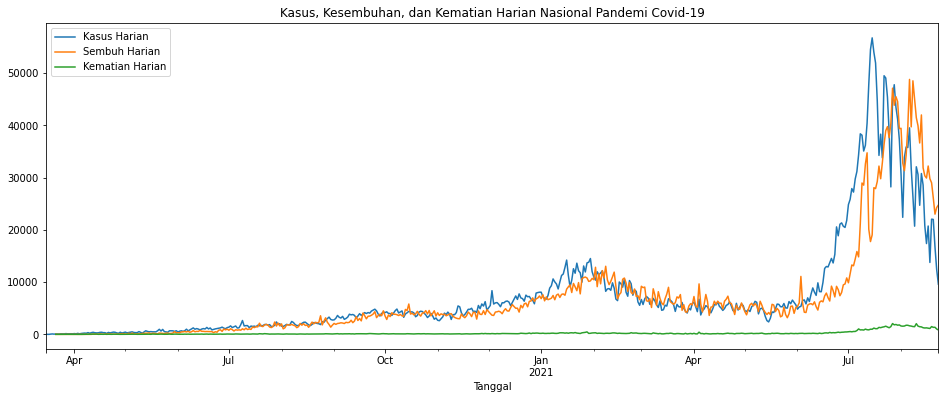

In [55]:
fig,ax=plt.subplots(figsize=(16,6))

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
daily_recovered['Nasional'].plot(kind='line',ax=ax,label='Sembuh Harian')
daily_death['Nasional'].plot(kind='line',ax=ax,label='Kematian Harian')
ax.set_xlabel('Tanggal')
ax.set_title('Kasus, Kesembuhan, dan Kematian Harian Nasional Pandemi Covid-19')
ax.legend()

**Insight dari grafik:**
- Tren kasus dan kesembuhan harian memiliki trend yang serupa.
- Jumlah orang yang meninggal karena covid-19 jauh lebih sedikit dibandingkan yang sembuh
- Berdasarkan trend kasus positif harian, Indonesia sudah mengalami dua kali puncak, dimana puncak pertama di sekitar Januari-Februari 2021 dan puncak kedua sekitar Juli 2021. *Apakah seluruh daerah mengalami dua kali puncak atau hanya daerah tertentu saja dengan jumlah kasus yang paling banyak di antara yang lain?*

In [56]:
island_prov={
    'Aceh':'Sumatera','Bali':'Bali-Nusa Tenggara','Banten':'Jawa','Babel':'Sumatera', 'Bengkulu':'Sumatera', 'DIY':'Jawa',
    'Jakarta':'Jawa', 'Jambi':'Sumatera', 'Jabar':'Jawa', 'Jateng':'Jawa', 'Jatim':'Jawa', 'Kalbar':'Kalimantan',
    'Kaltim':'Kalimantan', 'Kalteng':'Kalimantan', 'Kalsel':'Kalimantan', 'Kaltara':'Kalimantan', 'Kep Riau':'Sumatera',
    'NTB':'Bali-Nusa Tenggara', 'Sumsel':'Sumatera', 'Sumbar':'Sumatera', 'Sulut':'Sulawesi', 'Sumut':'Sumatera',
    'Sultra':'Sulawesi', 'Sulsel':'Sulawesi', 'Sulteng':'Sulawesi', 'Lampung':'Sumatera', 'Riau':'Sumatera',
    'Malut':'Maluku - Papua', 'Maluku':'Maluku - Papua', 'Papbar':'Maluku - Papua', 'Papua':'Maluku - Papua',
    'Sulbar':'Sulawesi', 'NTT':'Bali-Nusa Tenggara', 'Gorontalo':'Sulawesi'
}

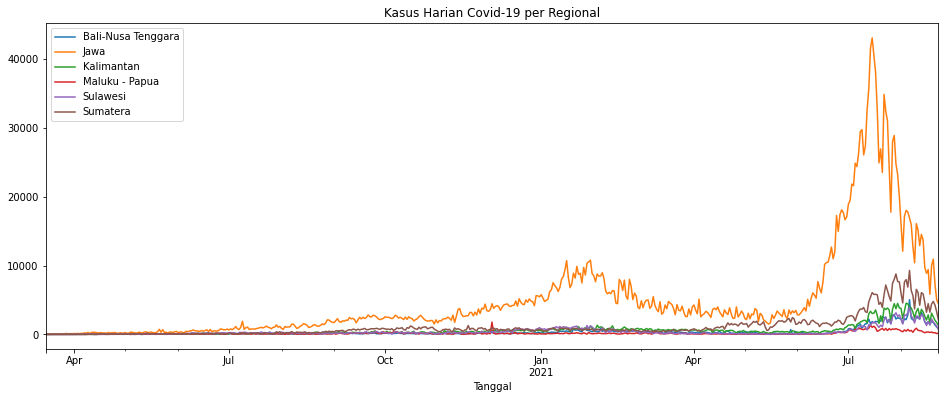

In [57]:
fig,ax=plt.subplots(figsize=(16,6))

daily_cases_region=daily_cases.rename(island_prov,axis=1).drop(columns='Nasional')
daily_cases_region=daily_cases_region.transpose().groupby(daily_cases_region.columns).sum().transpose()

daily_cases_region.plot(kind='line',ax=ax)
ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Covid-19 per Regional')
ax.legend()

**Insight dari grafik:**
- Kasus tertinggi terjadi di Pulau Jawa. Regional yang paling sedikit kasusnya adalah Maluku-Papua
- Puncak di bulan Januari - Februari 2021 hanya terjadi di pulau Jawa
- Semua regional mengalami puncak di sekitar bulan Juli 2021
- Selama Pulau Jawa mengalami penurunan jumlah kasus harian setelah mengalami puncak kedua, daerah lain seperti Sumatera, Kalimantan, Sulawesi, dan Bali-Nusa Tenggara mengalami kenaikan jumlah kasus

Puncak kasus Covid di tanggal 2021-07-15 00:00:00


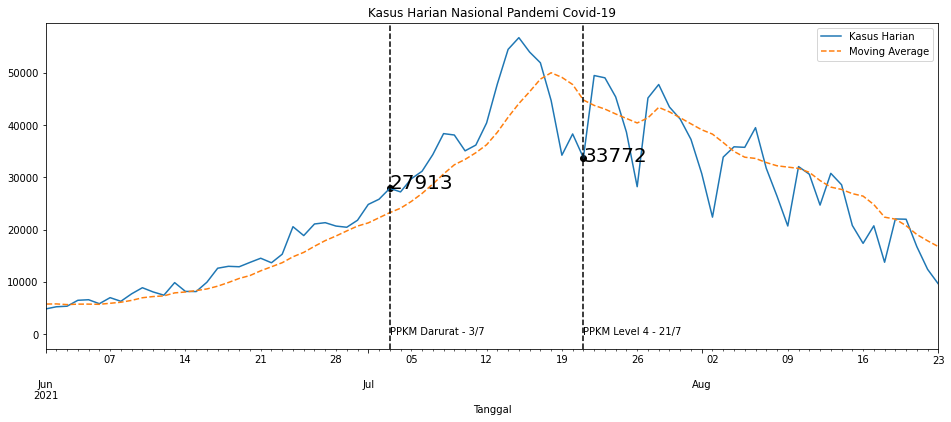

In [58]:
fig,ax=plt.subplots(figsize=(16,6))

MA_cases=daily_cases['Nasional'].rolling(window=7).mean()

daily_cases['Nasional'].plot(kind='line',ax=ax,label='Kasus Harian')
MA_cases.plot(kind='line',ax=ax,label='Moving Average', ls='--')

ax.set_xlabel('Tanggal')
ax.set_title('Kasus Harian Nasional Pandemi Covid-19')

ax.axvline(x='2021-07-03',color='black',ls='--')
ax.annotate('PPKM Darurat - 3/7', ('2021-07-03',1))
ax.axvline(x='2021-07-21',color='black',ls='--')
ax.annotate('PPKM Level 4 - 21/7', ('2021-07-21',1))

ax.scatter('2021-07-03',daily_cases['Nasional'].loc['2021-07-03'],color='black')
ax.scatter('2021-07-21',daily_cases['Nasional'].loc['2021-07-21'],color='black')
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-03']), ('2021-07-03',27900), fontsize=20)
ax.annotate('{:.0f}'.format(daily_cases['Nasional'].loc['2021-07-21']), ('2021-07-21',33000), fontsize=20)

ax.legend()
ax.set_xlim('2021-06-01','2021-08-23')

print('Puncak kasus Covid di tanggal',daily_cases[daily_cases['Nasional']==daily_cases['Nasional'].max()].index[0])

**Insight:**
- Dilansir https://megapolitan.kompas.com/read/2021/07/15/13220151/awal-mula-varian-delta-masuk-ke-jakarta-hingga-mendominasi-90-persen, varian Delta masuk ke Indonesia sejak tanggal 3 Mei 2021 dan diperparah dengan libur lebaran 21 Mei - 10 Juni 2021, kasus harian Indonesia terus melonjak hingga tanggal 3 Juli 2021 diberlakukan PPKM Darurat Jawa-Bali ketika kasus harian nasional mencapai 27.913 kasus.
- Pemberlakuan PPKM darurat belum cukup efektif menekan jumlah kasus harian sampai mengalami puncak di tanggal 15 Juli 2021 akibat varian Delta, namun mulai terjadi penurunan meskipun kasus melonjak lagi sejak diberlakukannya PPKM Level 4 di tanggal 21 Juli 2021.
- Sejak diberlakukan PPKM Level 4, tren kasus Covid kian menurun hingga tanggal 23 Agustus 2021 di bawah 10.000 kasus.

Text(0.5, 1.0, 'Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

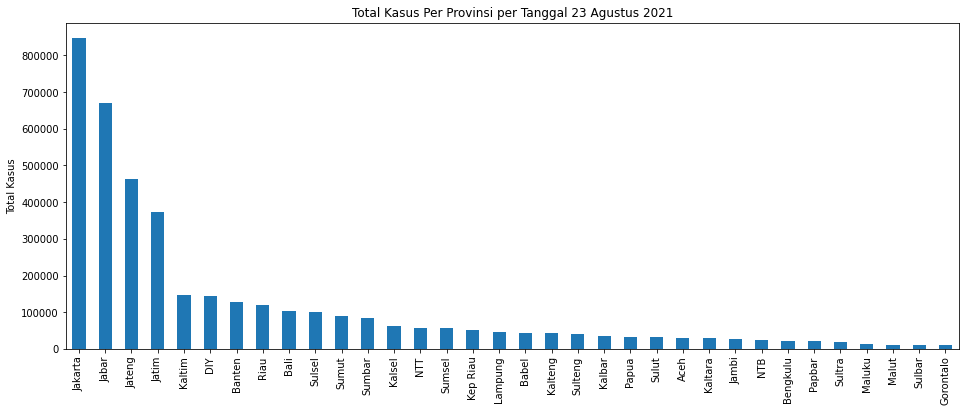

In [59]:
fig,ax=plt.subplots(figsize=(16,6))
daily_cases.drop(columns='Nasional').sum().sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Total Kasus')
ax.set_title('Total Kasus Per Provinsi per Tanggal 23 Agustus 2021')

**Insight:**

5 provinsi paling banyak kasusnya adalah Jakarta, Jabar, Jateng, Jatim, dan Kaltim (Di dominasi oleh pulau Jawa)

(737791.0, 738025.0)

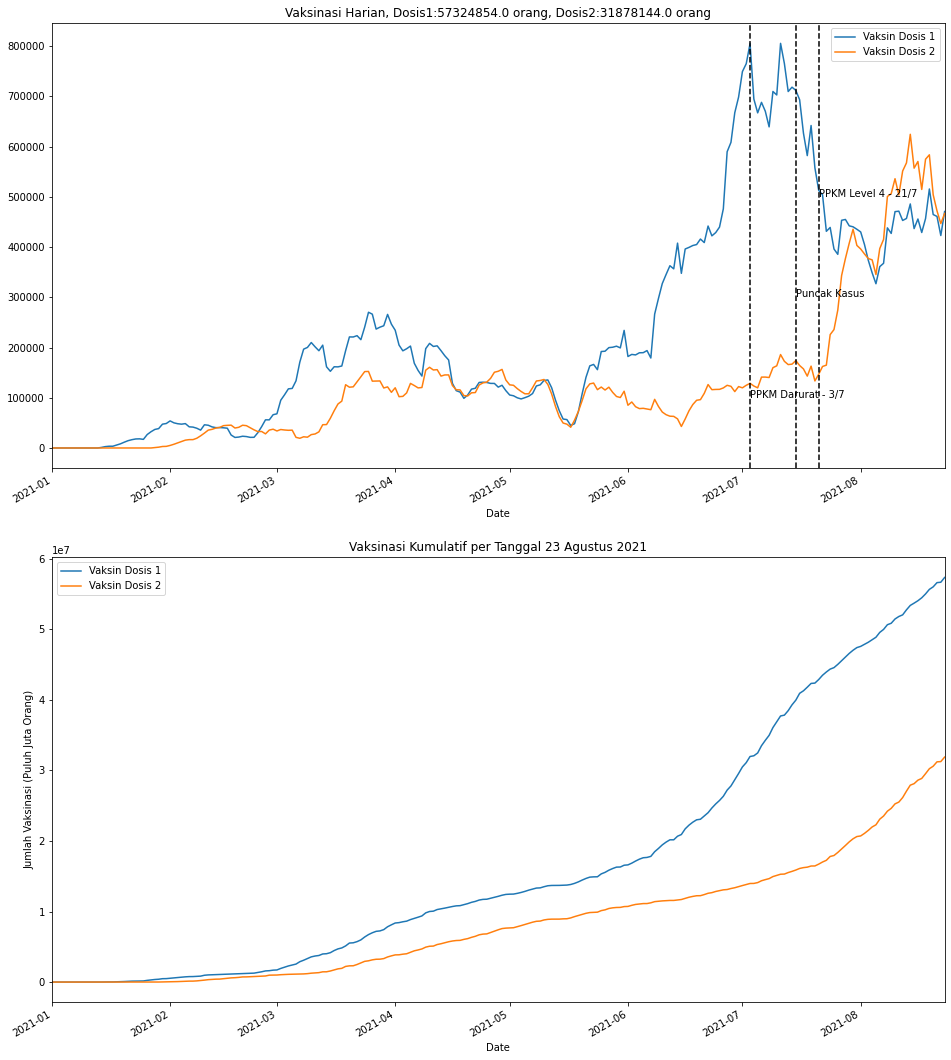

In [60]:
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(16,20))

daily_stats['Dosis1'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 1')
daily_stats['Dosis2'].rolling(window=7).mean().plot(kind='line',ax=ax[0],label='Vaksin Dosis 2')

ax[0].axvline(x='2021-07-15', color='black',ls='--')
ax[0].annotate('Puncak Kasus', ('2021-07-15',300000))
ax[0].axvline(x='2021-07-03',color='black',ls='--')
ax[0].annotate('PPKM Darurat - 3/7', ('2021-07-03',100000))
ax[0].axvline(x='2021-07-21',color='black',ls='--')
ax[0].annotate('PPKM Level 4 - 21/7', ('2021-07-21',500000))

ax[0].set_title('Vaksinasi Harian, Dosis1:{} orang, Dosis2:{} orang'.format(daily_stats['Dosis1'].sum(),daily_stats['Dosis2'].sum()))
ax[0].legend()
ax[0].set_xlim('2021-01-01','2021-08-23')

daily_stats['Dosis1'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 1')
daily_stats['Dosis2'].cumsum().plot(kind='line',ax=ax[1],label='Vaksin Dosis 2')
ax[1].set_xlim('2021-01-01','2021-08-23')
ax[1].set_ylabel('Jumlah Vaksinasi (Puluh Juta Orang)')
ax[1].set_title('Vaksinasi Kumulatif per Tanggal 23 Agustus 2021')
ax[1].legend()
ax[1].set_xlim('2021-01-01','2021-08-23')

**Insight:**
- Per tanggal 23 Agustus 2021, jumlah orang yang sudah divaksin dosis pertama sebanyak hampir 60 Juta orang sedangkan dosis 2 mencapai sekitar 30 Juta orang, perbedaannya hampir 50%.
- Jumlah orang yang telah mendapatkan vaksin dosis pertama mengalami lonjakan sejak bulan Juni 2021 namun cenderung menurun sejak diberlakukannya PPKM Darurat hingga awal agustus mengalami peningkatan kembali.
- Jumlah orang yang telah mendapatkan vaksin dosis kedua terus meningkat.